# Gradient Descent

From [The hundred-page machine learning book_full.pdf](https://web.kamihq.com/web/viewer.html?state=%7B%22ids%22:%5B%221ijJOtL-Ng_MSTW3TsEpcFg5C_MI_uHrg%22%5D,%22action%22:%22open%22,%22userId%22:%22100006339688710166679%22%7D)

## Partial derivative

Gradient is the generalization of derivative for functions that take several inputs (or one input in the form of a vector or some other complex structure).
A gradient of a function is a vector of **partial derivatives**
You can look at finding a partial derivative of a function as the process of finding the derivative by focusing on one of the function’s inputs and by considering all other inputs as constant values.
For example, if our function is defined as $$f\left(\left[x^{(1)}, x^{(2)}\right]\right)=a x^{(1)}+b x^{(2)}+c$$
then the partial derivative of function f with respect to x (1) , denoted as $$\frac{\partial f}{\partial x(1)}$$ is
$$\frac{\partial f}{\partial x^{(1)}}=a+0+0=a$$
where a is the derivative of the function ax (1)
the two zeroes are respectively derivatives of bx (2) and c, because x (2) is considered constant when we compute the derivative with respect to x (1) , and the derivative of any constant is zero.
Similarly, the partial derivative of function f with respect to $$x^{(2)}, \frac{\partial f}{\partial x^{(2)}}$$ is
$$\frac{\partial f}{\partial x^{(2)}}=0+b+0=b$$
The gradient of function f, denoted as $$\nabla f$$
is given by the vector $$\left[\frac{\partial f}{\partial x^{(1)}}, \frac{\partial f}{\partial x^{(2)}}\right]$$

## Algorithm

you often encounter references to gradient descent or stochastic gradient descent. These are two most frequently used optimization algorithms used in cases where the optimization criterion is differentiable.

Gradient descent is an iterative optimization algorithm for finding the minimum of a function.
To find a local minimum of a function using gradient descent, one starts at some random point and takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point

Gradient descent can be used to find optimal parameters for linear and logistic regression, SVM and also neural networks which we consider later. For many models, such as logistic regression or SVM, the optimization criterion is convex
Convex functions have only one minimum, which is global. Optimization criteria for neural networks are not convex, but in practice even finding a local minimum suffices
![Minima](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Extrema_example_original.svg/1280px-Extrema_example_original.svg.png)


## Prepare dataset

Before we begin to train the model, let’s have look at what is a linear
regression.

Imagine you have two variables, $x$ and $y$ and your task is to predict
the value of $y$ knowing the value of $x$. If you plot the data, you can
see a positive relationship between your independent variable, $x$ and
your dependent variable $y$.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

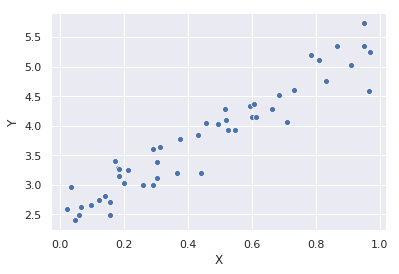

In [0]:
np.random.seed(42)
X = np.random.rand(50,1).flatten()
Y = 2 + 3 * X + np.random.normal(np.mean(X), np.std(X), 50)

df = pd.DataFrame({'X': X,
                   'Y': Y})
sns.scatterplot(x="X", y="Y", data=df)

You may observe, if $x = .6$, $y$ will roughly be equal to 4 and if
$x = .2$, $y$ will be around 3.

This is not a very accurate method and prone to error, especially with a
dataset with hundreds of thousands of points.

A linear regression is evaluated with an equation. The variable $y$ is
explained by one or many covariates. In your example, there is only one
dependent variable. If you have to write this equation, it will be:

$$y = \beta + \alpha X + \epsilon$$

With:

-   $\beta$ is the bias. i.e. if $x = 0$, $y = \beta$

-   $\alpha$ is the weight associated to $x$

-   $\epsilon$ is the residual or the error of the model. It includes
    what the model cannot learn from the data

Imagine you fit the model and you find the following solution for:

-   $\beta = 2.8$

-   $\alpha = X$

You can substitute those numbers in the equation and it becomes:

$$y = 2.2 + Xx$$

You have now a better way to find the values for $y$. That is, you can
replace $x$ with any value you want to predict $y$. In the image below,
we have replace $x$ in the equation with all the values in the dataset
and plot the result.

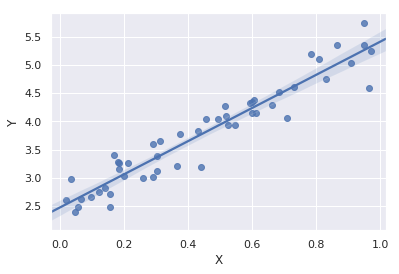

In [0]:
sns.regplot(x="X", y="Y", data=df)

The blue line represents the fitted value, that is the values of $y$ for
each value of $x$. You don’t need to see the value of $x$ to predict
$y$, for each $x$ there is an$y$ which belongs to the red line. You can
also predict for values of $x$ higher than 1!

If you want to extend the linear regression to more covariates, you can
by adding more variables to the model. The difference between
traditional analysis and linear regression is the linear regression
looks at how $y$ will react for each variable $X$ taken independently.

Let’s see an example. Imagine you want to predict the sales of an ice
cream shop. The dataset contains different information such as the
weather (i.e rainy, sunny, cloudy), customer informations (i.e salary,
gender, marital status).

Traditional analysis will try to predict the sale by let’s say computing
the average for each variable and try to estimate the sale for different
scenarios. It will lead to poor predictions and restrict the analysis to
the chosen scenario.

If you use linear regression, you can write this equation:

$$Sales  = \beta + \alpha_{1}X + \epsilon$$

The algorithm will find the best solution for the weights; it means it
will try to minimize the cost (the difference between the fitted line
and the data points).

**How the algorithm works**

![](https://www.guru99.com/images/1/080618_0520_LinearRegre3.png)

The algorithm will choose a random number for each $\beta$ and $\alpha$
and replace the value of $x$ to get the predicted value of $y$. If the
dataset has 100 observations, the algorithm computes 100 predicted
values.

We can compute the error, noted $\epsilon,\ $ of the model, which is the
difference between the predicted value and the real value. A positive
error means the model underestimates the prediction of y, and a negative
error means the model overestimates the prediction of y.

$$\epsilon = y - ypred$$

Your goal is to minimize the square of the error. The algorithm computes
the mean of the square error. This step is called minimization of the
error. For linear regression is the **Mean Square Error**, also called
MSE. Mathematically, it is:

$$MSE(X) = \frac{1}{m}\sum_{i = 1}^{m}(\alpha^{T}x^{i} - y^{i})^{2}$$

Where:

-   $\alpha^{T}\ $is the weights so $\alpha^{T}x^{i}\ $refers to the
    predicted value

-   y is the real values

-   m is the number of observations

Note that $\alpha^{T}$ means it uses the transpose of the matrices. The
$\frac{1}{m}\sum$ is the mathematical notation of the mean.

The goal is to find the best $\alpha$ that minimize the MSE

If the average error is large, it means the model performs poorly and
the weights are not chosen properly. To correct the weights, you need to
use an optimizer. The traditional optimizer is called **Gradient Descent**.

The gradient descent takes the derivative and decreases or increases the
weight. If the derivative is positive, the weight is decreased. If the
derivative is negative, the weight increases. The model will update the
weights and recompute the error. This process is repeated until the
error does not change anymore. Each process is called an **iteration**.
Besides, the gradients are multiplied by a learning rate. It indicates
the speed of the learning.

If the learning rate is too small, it will take very long time for the
algorithm to converge (i.e requires lots of iterations). If the learning
rate is too high, the algorithm might never converge.

![](https://github.com/thomaspernet/Tensorflow/blob/master/tensorflow/15_linear-regression_files/image60.png?raw=true)

You can see from the picture above, the model repeats the process about
20 times before to find a stable value for the weights, therefore
reaching the lowest error.

**Note that**, the error is not equal to zero but stabilizes around 5.
It means, the model makes a typical error of 5. If you want to reduce
the error, you need to add more information to the model such as more
variables or use different estimators.

You remember the first equation

$$y = \beta + \alpha X + \epsilon$$

We don’t know what the optimal values for $\beta$  and $\alpha$ are and we want to learn them from data. To do that, we look for such values for $\beta$ and $\alpha$ that minimize the mean squared error:

$$l \stackrel{\mathrm{def}}{=} \frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\left(\alpha x_{i}+\beta\right)\right)^{2}$$

Gradient descent starts with calculating the partial derivative for every parameter: 

$$\begin{aligned} \frac{\partial l}{\partial \beta} &=\frac{1}{N} \sum_{i=1}^{N}-2 x_{i}\left(y_{i}-\left(\alpha x_{i}+\beta\right)\right) \\ \frac{\partial l}{\partial \alpha} &=\frac{1}{N} \sum_{i=1}^{N}-2\left(y_{i}-\left(\alpha x_{i}+\beta\right)\right) \end{aligned}$$

To find the partial derivative of the term $(yi−(wx+b))^2$ with respect to w I applied the chain rule.

Here, we have the chain $f = f_2(f_1)$ where $f_1 = yi −(wx+b)$ and $f_2 = f_1^2$ . To find a partial derivative of f with respect to w we have to first find the partial derivative of f with respect to $f_2$ which is equal to $2(yi −(wx+b))$ then we have to multiply it by the partial derivative of $yi −(wx+b)$ with respect to $\beta$  which is equal to $ −x$

Gradient descent proceeds in epochs. An epoch consists of using the training set entirely to update each parameter. In the beginning, the first epoch, we initialize $w \leftarrow 0 \text { and } b \leftarrow 0$.

The partial derivatives, $\frac{\partial l}{\partial w} \text { and } \frac{\partial l}{\partial b}$ equal, respectively $\frac{-2}{N} \sum_{i=1}^{N} x_{i} y_{i}$ and $\frac{-2}{N} \sum_{i=1}^{N} y_{i}$ At each epoch, we update  $\alpha$  and $\beta$ using partial derivatives. The learning rate α controls the size of an update: 

$$\begin{array}{c}{w \leftarrow w-\alpha \frac{\partial l}{\partial w}} \\ {b \leftarrow b-\alpha \frac{\partial l}{\partial b}}\end{array}$$

We subtract (as opposed to adding) partial derivatives from the values of parameters because derivatives are indicators of growth of a function.

If a derivative is positive at some point , then the function grows at this point. Because we want to minimize the objective function, when the derivative is positive we know that we need to move our parameter in the opposite direction (to the left on the axis of coordinates).

When the derivative is negative (function is decreasing), we need to move our parameter to the right to decrease the value of the function even more. Subtracting a negative value from a parameter moves it to the right.

At the next epoch, we recalculate partial derivatives using eq. above with the updated values of w and b; we continue the process until convergence. Typically, we need many epochs until we start seeing that the values for $\alpha$  and $\beta$ don’t change much after each epoch; then we stop.



In [0]:
def update_alpha_beta(X, Y, b, a, lr):
  dl_db = 0.0
  dl_da = 0.0
  
  N  = len(X)
  
  ## Compute derivative
  dl_da = np.mean(-2 * X * (Y - (a * X + b)))
  dl_db = np.mean(-2 * (Y - (a * X + b)))
  
  ## Update Beta and alpha
  
  b = b - lr * dl_db
  a = a - lr * dl_da
  
  return b, a

The functionthat loops over multiple epochs is shown below: 

In [0]:
update_alpha_beta(X = df['X'],
                  Y = df['Y'],
                  b = 0,
                  a = 0,
                  lr = 0.01) 

(0.07565706650966983, 0.038539843928379294)

The function `MSE` in the below code snippet is a function that computes the mean squared error. It is defined as: 

$$MSE(X) = \frac{1}{m}\sum_{i = 1}^{m}((\beta + \alpha^{T}x^{i}) - y^{i})^{2}$$

In [0]:
def MSE(X, Y, b, a):
  
  y_pred = b + a * X
  total_error = np.mean((y_pred - Y)**2)
  return total_error

In [0]:
MSE(X = df['X'],
    Y = df['Y'],
    b = 0.07565706650966983,
    a = 0.038539843928379294)

14.370142687175758

In [0]:
def train(X, Y, b, a, lr, epochs):
  
  for e in range(epochs):
    b, a = update_alpha_beta(X = df['X'],
                  Y = df['Y'],
                  b = b,
                  a = a,
                  lr = 0.01) 
    
    if e % 400 == 0:
      print("epoch:", e, "loss: ", MSE(X, Y, b, a)) 
      plt.plot(X, Y, 'o', label='original data')
      plt.plot(X, b + a * X, 'r', label='fitted line')
      plt.legend()
      plt.show()
  
  return b, a

epoch: 0 loss:  14.370142687175758


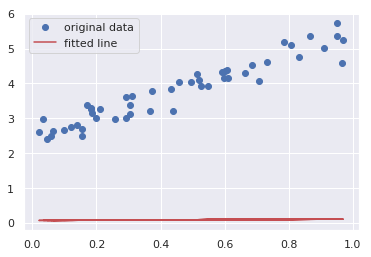

epoch: 400 loss:  0.12448016935343074


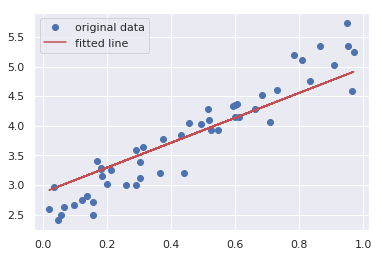

epoch: 800 loss:  0.08674116407751747


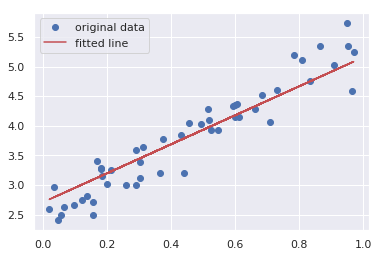

epoch: 1200 loss:  0.07391624624742799


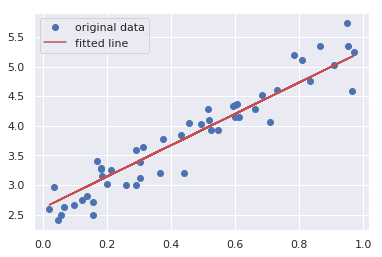

epoch: 1600 loss:  0.06955792529639983


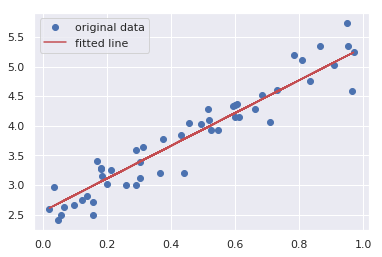

(2.5195135925077126, 2.840028264127747)

In [0]:
train(X = df['X'],
      Y = df['Y'],
      b = 0,
      a = 0,
      lr = 0.001,
      epochs = 2000)

In [0]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['X'], df['Y'])
print("slope: %f    intercept: %f MSE: %f" % (slope, intercept, r_value**2))

slope: 2.936102    intercept: 2.473575 MSE: 0.912845


Minibatch stochastic gradient descent (minibatch SGD) is a version of the algorithm that speeds up the computation by approximating the gradient using smaller batches (subsets) of the training data. SGD itself has various  "upgrades". 

Adagrad is a version of SGD that scales $lr$ for each parameter according to the history of gradients. As a result, $lr$ is reduced for very large gradients and vice-versa. 

Momentum is a method that helps accelerate SGD by orienting the gradient descent in the relevant direction and reducing oscillations. In neural network training, variants of SGD such as RMSprop and Adam, are very frequently used. 

Notice that gradient descent and its variants are not machine learning algorithms. They are solvers of minimization problems in which the function to minimize has a gradient (in most points of its domain)